This notebook captures climax movements. Bear dominating a day, but next day bulls ctake charge with large counter move.

In [21]:
import numpy as np
import pandas as pd

import datetime
from pandas.tseries.frequencies import to_offset

import niftyutils
from niftyutils import load_nifty_data

import matplotlib.pyplot as plt

In [22]:
start_date = datetime.datetime(2005,8,1)
end_date = datetime.datetime(2020,9,25)
nifty_data = load_nifty_data(start_date,end_date)

In [23]:
daily_returns = (nifty_data['Close']/nifty_data['Close'].shift(1) - 1)*100
daily_returns = daily_returns.dropna()

In [24]:
climax_bear_move = np.mean(daily_returns) - 2*np.std(daily_returns)
climax_bull_move = np.mean(daily_returns) + 1.5*np.std(daily_returns)
print(climax_bear_move,climax_bull_move)

-2.829905297868611 2.213454763355733


In [25]:
two_day_return_history_data = pd.concat([daily_returns.rename('Current Day'),daily_returns.shift(1).rename('Previous Day')], axis=1)
two_day_return_history_data = two_day_return_history_data.dropna()

In [26]:
reversal_data = two_day_return_history_data[(two_day_return_history_data['Current Day'] > climax_bull_move) &
                                            (two_day_return_history_data['Previous Day'] < climax_bear_move)].copy()

In [27]:
pct_change_after_reversal = []
for ix, row in reversal_data[:-1].iterrows():
    pct_change_by_day = []
    for i in range(1,5):
        after_ix = daily_returns.index.get_loc(ix) + i
        ret = daily_returns[after_ix]
        pct_change_by_day.append(ret)
    
    pct_change_after_reversal.append(pct_change_by_day)

In [28]:
reversal_study_data = pd.DataFrame(pct_change_after_reversal, columns=['1st','2nd','3rd','4th'],
                                                              index = reversal_data[:-1].index)
reversal_study_data = pd.concat([reversal_data[:-1],reversal_study_data], axis=1)
reversal_study_data = reversal_study_data[['Previous Day','Current Day','1st','2nd','3rd','4th']]
reversal_study_data

,Previous Day,Current Day,1st,2nd,3rd,4th
Date,,,,,,
2006-05-23,-5.098710,3.829490,-2.619282,1.994832,1.003871,0.165130
2006-06-02,-3.542762,4.358174,-2.416420,-2.630401,-2.616348,-4.757993
2006-06-09,-4.757993,5.210417,-3.120748,-4.089166,-1.145196,6.305074
2008-01-23,-5.941868,6.207009,-3.266134,6.951495,-2.029405,0.127036
2008-01-25,-3.266134,6.951495,-2.029405,0.127036,-2.143615,-0.583443
2008-03-14,-5.098522,2.642962,-5.113996,0.663987,0.903375,0.784880
2008-07-02,-3.558921,5.045230,-4.094446,2.298924,0.348606,-1.028536
2008-07-04,-4.094446,2.298924,0.348606,-1.028536,4.225846,0.122682
2008-07-30,-3.283627,2.952373,0.449746,1.860165,-0.412366,2.445767


<AxesSubplot:>

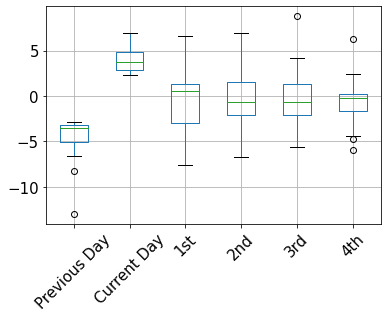

In [29]:
reversal_study_data.boxplot(grid=True, rot=45, fontsize=15)

In [30]:
reversal_study_data.describe()

,Previous Day,Current Day,1st,2nd,3rd,4th
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,-4.516768,3.941774,-0.317617,-0.452051,-0.102984,-0.559196
std,2.345270,1.382837,3.584812,3.060493,3.084455,2.562876
min,-12.980464,2.291946,-7.612102,-6.657667,-5.556454,-5.963050
25%,-5.013390,2.821391,-2.995382,-2.045528,-2.125174,-1.643068
50%,-3.510174,3.703989,0.498499,-0.702765,-0.709337,-0.221789
75%,-3.169187,4.873466,1.324048,1.561120,1.298824,0.253299
max,-2.851884,6.951495,6.624749,6.951495,8.763205,6.305074


In [31]:
reversal_study_data.describe(percentiles=[0.15,0.85])

,Previous Day,Current Day,1st,2nd,3rd,4th
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,-4.516768,3.941774,-0.317617,-0.452051,-0.102984,-0.559196
std,2.345270,1.382837,3.584812,3.060493,3.084455,2.562876
min,-12.980464,2.291946,-7.612102,-6.657667,-5.556454,-5.963050
15%,-5.815394,2.656403,-3.890316,-2.611518,-2.572578,-2.386370
50%,-3.510174,3.703989,0.498499,-0.702765,-0.709337,-0.221789
85%,-3.102899,5.452459,2.162213,2.253310,2.085060,1.020633
max,-2.851884,6.951495,6.624749,6.951495,8.763205,6.305074
